# Slice sampling

Very simple sampling algorithm, basically we sample first a height and then the width ($x$ location). So to initialize we sample a $x_0 = randomNorm$ for instance from a normal distribution. Then we iterate for each sample:

- Sample a height $u = Unif(0, f(x_{i-1}))$
- Define $z$ as the inverse PDF from $u$
- Sample $x_i = Unif(-z, z)$

In [15]:
import math
def normal_dist(x, sig=0.5, mu=1):
    return (1/math.sqrt(2*math.pi*sig**2)) * math.exp(-(x - mu)**2/(2*sig**2))
def mixed_normal(x):
    return normal_dist(x, sig=0.8, mu=6) * 0.2 + normal_dist(x, sig=1.5, mu=10) * 0.8

def normal_inv(y, sig=0.5, mu=1):
    x = np.sqrt(-2*sig**2 * np.log(y * sig * np.sqrt(2*np.pi)))
    return mu-x, mu+x

def mixed_normal_inv(y):
    y0, y1 = normal_inv(y, sig=0.8, mu=6)
    z0, z1 = normal_inv(y, sig=1.5, mu=10)
    return y0*0.2-z0*0.8, y1*0.2+z1*0.8

In [16]:
#Sampling methods
import numpy as np

def slice_sampling(dist, dist_inv, length=100):
    x = np.random.normal(9, 5, size=1)
    samples = []

    for i in range(length):
        u = np.random.uniform(0,dist(x))
        z0, z1 = dist_inv(u)
        x = np.random.uniform(z0,z1,1)
        samples.append(x)

    return samples

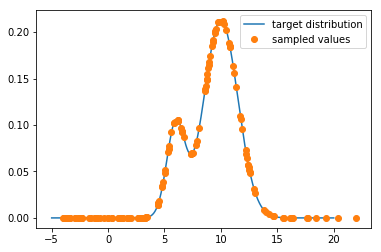

In [17]:
import matplotlib.pyplot as plt

r = (-5, 20)
plt.plot(np.linspace(r[0], r[1], 1000), [mixed_normal(s) for s in np.linspace(r[0], r[1], 1000)], label='target distribution')
samples = slice_sampling(mixed_normal, mixed_normal_inv, length=150)
plt.plot(samples, [mixed_normal(s) for s in samples], 'o', label='sampled values')
plt.legend()
plt.show()